In [1]:
import os
from kid_readout.measurement import core, legacy, multiple
from kid_readout.measurement.io import nc, npy, readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
nc_filename = '/data/readout/2015-05-11_150346_compressor_noise_60_s.nc'
rnc = readoutnc.ReadoutNetCDF(nc_filename)
on_index = 0
off_index = 1

In [3]:
rnc.sweeps

In [4]:
rnc.timestreams

In [5]:
ssa_off = legacy.sweepstreamarray_from_rnc(rnc, off_index, off_index)
ssa_on = legacy.sweepstreamarray_from_rnc(rnc, on_index, on_index)

In [6]:
ssa_off.to_dataframe()

,resonator_A_mag,resonator_A_mag_error,resonator_A_phase,resonator_A_phase_error,resonator_Q,resonator_Q_e_imag,resonator_Q_e_imag_error,resonator_Q_e_real,resonator_Q_e_real_error,resonator_Q_error,...,roach_modulation_output,roach_modulation_rate,roach_num_filterbank_channels,roach_num_tone_samples,roach_num_tones,roach_stream_sample_rate,roach_waveform_normalization,io_class,root_path,node_path
0,0.047544,0.000042,0,0,59060.987251,31493.401440,317.026953,83168.120455,326.126986,275.519158,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
1,0.046428,0.000082,0,0,85082.238305,27402.211204,753.188134,104924.186237,817.704410,847.201843,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
2,0.047131,0.000044,0,0,89281.584673,32315.290697,342.015055,98374.293470,365.475795,425.644153,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
3,0.046243,0.000079,0,0,95629.840446,34430.274817,877.679632,120600.406248,949.938214,980.087139,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
4,0.044679,0.000060,0,0,106764.122323,36452.545096,640.842159,120068.735996,680.881008,784.117847,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
5,0.043443,0.000100,0,0,87960.983061,16876.979654,918.216751,111325.321406,1041.374683,1056.115272,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
6,0.039886,0.000097,0,0,116223.371825,25443.694664,1529.422248,153819.804544,1704.972158,1666.423476,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
7,0.039865,0.000062,0,0,109732.363283,18152.067635,885.331333,148326.717557,997.396698,934.149850,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
8,0.036289,0.000080,0,0,42632.119903,10257.843059,227.427743,47487.891852,267.187092,270.649389,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN
9,0.036222,0.000085,0,0,42311.640063,7442.197508,226.049181,47919.910985,279.943916,277.681439,...,0,1,16384,2097152,16,15625,0.000013,NaN,NaN,NaN


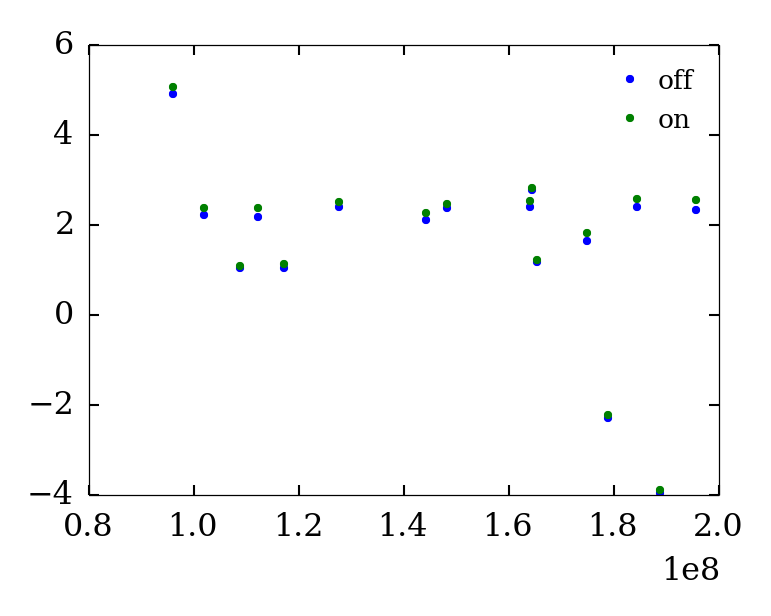

In [7]:
df_off = ssa_off.to_dataframe()
df_on = ssa_on.to_dataframe()
plt.plot(df_off.resonator_f_0, 1e6 * (1 / df_off.resonator_Q - 1 / df_off.resonator_Q_e_real), '.', label='off')
plt.plot(df_on.resonator_f_0, 1e6 * (1 / df_on.resonator_Q - 1 / df_on.resonator_Q_e_real), '.', label='on')
plt.legend(loc='best', fontsize='xx-small');

# Test read/write

In [8]:
name = 'sweepstreamarray'

In [9]:
directory = '/home/flanigan/temp/nc'
nc_filename = 'test.nc'
nc_root_path = os.path.join(directory, nc_filename)
try:
    os.remove(nc_root_path)
except OSError:
    print("Not deleted: {}".format(nc_root_path))

In [10]:
nc_io = nc.IO(nc_root_path)
%time core.write(ssa_off, nc_io, name)

CPU times: user 256 ms, sys: 200 ms, total: 456 ms
Wall time: 445 ms


In [11]:
%timeit core.read(nc_io, name)

10 loops, best of 3: 137 ms per loop


In [12]:
!rm -r /home/flanigan/temp/npy

In [13]:
npy_root_path = '/home/flanigan/temp/npy'
npy_io = npy.IO(npy_root_path)
%time core.write(ssa_off, npy_io, name)

CPU times: user 51 ms, sys: 172 ms, total: 223 ms
Wall time: 225 ms


In [14]:
%timeit core.read(npy_io, name)

10 loops, best of 3: 167 ms per loop


In [15]:
npy_io_memmap = npy.IO(npy_root_path, memmap=True)
%timeit core.read(npy_io_memmap, name)

error: [Errno 24] Too many open files